In [1]:
from rdcanon import util, canon_reaction_smarts
import pandas as pd
import numpy as np
import random
from rdkit import RDLogger, Chem
from rdkit.Chem import AllChem
RDLogger.DisableLog('rdApp.*')                                                                                                                                                           


run_reactants_experiments = pd.read_excel(
    "data/reaction_smarts_out.xlsx")



rso = [AllChem.ReactionFromSmarts(x) for x in run_reactants_experiments["reaction_smarts"]]
pcso = [AllChem.ReactionFromSmarts(canon_reaction_smarts(x, True, "pubchem")) for x in run_reactants_experiments["reaction_smarts"]]
dbso = [AllChem.ReactionFromSmarts(canon_reaction_smarts(x, True, "drugbank")) for x in run_reactants_experiments["reaction_smarts"]]
npso = [AllChem.ReactionFromSmarts(canon_reaction_smarts(x, True, "npatlas")) for x in run_reactants_experiments["reaction_smarts"]]
mso = [Chem.MolFromSmiles(x) for x in run_reactants_experiments["matching_substrate"]]
nmso = [Chem.MolFromSmiles(x) for x in run_reactants_experiments["non_matching_substrate"]]


In [2]:
import timeit
import time


t1s, t2s, t3s, t4s = [], [], [], []

for i in range(0,10):
    print(len(rso))
    t1 = timeit.timeit(
        lambda: util.run_reactants_library(rso, mso),
        number=10,
        timer=time.process_time,
    )

    t1s.append(t1)
    print(t1)

    t2 = timeit.timeit(
        lambda: util.run_reactants_library(pcso, mso),
        number=10,
        timer=time.process_time,
    )

    t2s.append(t2)
    print(t2)
    t3 = timeit.timeit(
        lambda: util.run_reactants_library(dbso, mso),
        number=10,
        timer=time.process_time,
    )

    t3s.append(t3)
    print(t3)
    t4 = timeit.timeit(
        lambda: util.run_reactants_library(npso, mso),
        number=10,
        timer=time.process_time,
    )
    print(t4)
    t4s.append(t4)

print(np.mean(t1s),
        np.mean(t2s),
        np.mean(t3s),
        np.mean(t4s))

5001
5.989524000000017
5.9375189999999805
6.007753000000008
6.098401999999993
5001
5.994996000000015
6.046925000000016
5.96768400000002
6.003060000000005
5001
5.987141000000008
5.976441999999963
5.973015000000032
5.988282999999967
5001
5.9869789999999625
5.971851000000015
5.971843000000035
5.971120999999982
5001
5.9918140000000335
6.1987100000000055
6.146975999999995
6.008272000000034
5001
6.011885999999947
6.048600999999962
6.293002999999999
6.539078000000018
5001
6.256918999999982
5.994318999999962
6.169506000000013
6.145359999999982
5001
6.120864999999981
6.05261900000005
6.109541000000036
6.103317000000004
5001
6.081576999999982
6.074881000000005
6.450154999999995
6.003709000000015
5001
6.016418000000044
6.003775000000019
6.063243
6.047183000000018
6.043811899999997 6.030564199999998 6.115271900000013 6.090778500000002


In [3]:
t1s_nm, t2s_nm, t3s_nm, t4s_nm = [], [], [], []

for i in range(0,10):


    t1 = timeit.timeit(
        lambda: util.run_reactants_library(rso, nmso),
        number=100,
        timer=time.process_time,
    )

    t1s_nm.append(t1)

    t2 = timeit.timeit(
        lambda: util.run_reactants_library(pcso, nmso),
        number=100,
        timer=time.process_time,
    )

    t2s_nm.append(t2)

    t3 = timeit.timeit(
        lambda: util.run_reactants_library(dbso, nmso),
        number=100,
        timer=time.process_time,
    )

    t3s_nm.append(t3)

    t4 = timeit.timeit(
        lambda: util.run_reactants_library(npso, nmso),
        number=100,
        timer=time.process_time,
    )

    t4s_nm.append(t4)



print(np.mean(t1s_nm),
        np.mean(t2s_nm),
        np.mean(t3s_nm),
        np.mean(t4s_nm))

2.1578566999999964 1.9826889999999993 1.983485800000011 2.0519888000000037


[[5.989524 5.937519 6.007753 6.098402]
 [5.994996 6.046925 5.967684 6.00306 ]
 [5.987141 5.976442 5.973015 5.988283]
 [5.986979 5.971851 5.971843 5.971121]
 [5.991814 6.19871  6.146976 6.008272]
 [6.011886 6.048601 6.293003 6.539078]
 [6.256919 5.994319 6.169506 6.14536 ]
 [6.120865 6.052619 6.109541 6.103317]
 [6.081577 6.074881 6.450155 6.003709]
 [6.016418 6.003775 6.063243 6.047183]]
[[2.175472 1.975538 1.986298 2.038588]
 [2.137273 1.98064  1.98876  2.045409]
 [2.132562 1.971322 1.992104 2.043342]
 [2.172896 1.98863  1.993866 2.048908]
 [2.160263 1.988649 1.982914 2.067269]
 [2.172701 1.985608 1.982701 2.046343]
 [2.163654 1.991292 1.994065 2.067901]
 [2.15842  1.975718 1.961955 2.048109]
 [2.14893  1.979074 1.976805 2.057879]
 [2.156396 1.990419 1.97539  2.05614 ]]


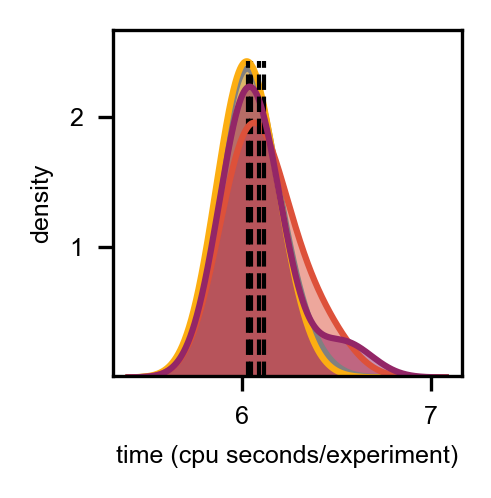

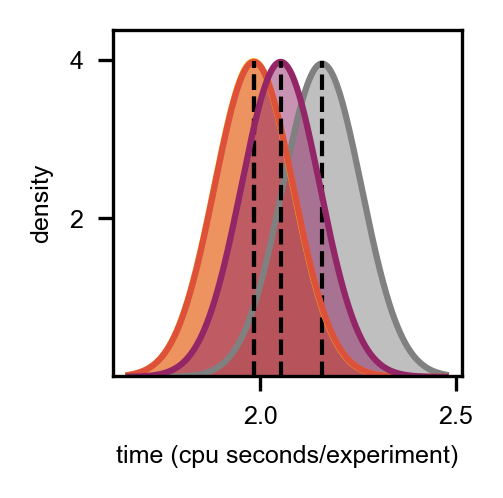

In [5]:
data = np.array([t1s, t2s, t3s, t4s])
print(data.T)
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.15, figsize=(1.5, 1.5), title="figures/run_reactants_db_matching.png")


data = np.array([t1s_nm, t2s_nm, t3s_nm, t4s_nm])

print(data.T)

util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=1.4, bandwidth=.1, figsize=(1.5, 1.5), title="figures/run_reactants_db_non_matching.png")